# Experimento Millikan - Laboratorio de Fisica Contemporanea I
Daiana Dominikow - 2022 

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import io


In [ ]:
from google.colab import files

millikan_file= files.upload()

df = pd.read_csv(io.BytesIO(millikan_file['Millikan Data.csv']),sep=';', decimal=',')

print(df)

In [ ]:
# datos
eta = 1.859e-5                  # viscosidad del aire, kg.m-1.s-1
rho_air = 1.17                  # densidad aire, kg.m-3
rho_oil = 885                  # densidad aceice, kg.m-3
rhop = rho_oil - rho_air
g = 9.80                       # aceleracion
d = 1.45e-3                    # recorrido de la bolita
e = 1.6e-19                    # carga del electron
dp= 6.36e-3

# calculos 
df['a'] = np.sqrt(9*eta*d/df['t_bajada']/2/rhop/g)

df['E'] = df['V']/dp

df['q'] = 6 * np.pi * eta * df['a'] * d / df['E'] * (1/df['t_bajada'] + 1/df['t_subida'])

df['q/e'] = df['q']/e


In [ ]:
df_agg = df.groupby(['gotas ']).agg(radio_gota = ('a','mean'),campo_electrico = ('E','mean'),carga_gota= ('q','mean'),n=('q/e','mean'))

display(df_agg)

,radio_gota,campo_electrico,carga_gota,n
gotas,,,,
Augusto,1.239183e-06,117138.364780,1.516915e-18,9.480721
Erwin,1.414620e-06,91194.968553,2.572091e-18,16.075569
Franco,9.155565e-07,153866.074732,3.457772e-19,2.161107
Juan,1.931414e-06,31446.540881,1.401986e-17,87.624135
Kari,1.193592e-06,122169.811321,7.039566e-19,4.399729
Lean,8.564964e-07,53144.654088,1.671104e-18,10.444403
Mica,9.125892e-07,116981.132075,8.397977e-19,5.248736
Nati,1.310871e-06,53144.654088,2.849540e-18,17.809624


carga de la gota respecto al radio


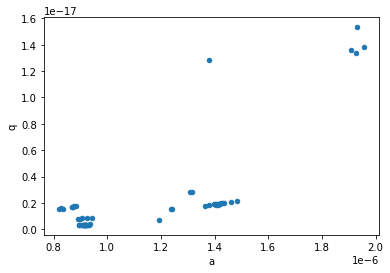

In [ ]:
print('carga de la gota respecto al radio')

df.plot(kind = 'scatter', x = 'a', y = 'q')



electrones??? respecto al radio


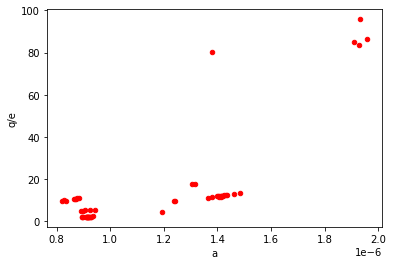

In [ ]:
print('electrones??? respecto al radio')

df.plot(kind = 'scatter', x = 'a', y = 'q/e', c='r')
